In [4]:
import random
from math import pi, cos, sin
import matplotlib.pyplot as plt
import numpy as np

# Trabajo Práctico 1

## Ejercicio 1

a) Implementar un Generador Congruencial Lineal (GCL) de módulo 2^32, multiplicador 1013904223, incremento de
1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

In [5]:
semilla = (99732 + 100687 + 99627 + 98625)//4
print(semilla)

99667


In [6]:
def gcl(estado_inicial):
    nuevo_estado = (1013904223 * estado_inicial + 1664525) % 2**32
    return nuevo_estado, nuevo_estado

b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1

In [7]:
def gcl_reduce(estado_inicial):
    nuevo_estado, semilla_nueva = gcl(estado_inicial)
    return nuevo_estado/2**32, semilla_nueva

c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

In [8]:
def numeros_random(muestra, generador, semilla):
    estado_actual = semilla
    resultado = []
    for i in range(muestra):
        numero_random, estado_actual = generador(estado_actual)
        resultado.append(numero_random)
    return resultado

In [83]:
muestra = 50000
resultado_gcl = numeros_random(muestra, gcl, semilla)
resultado_gcl_reduce = numeros_random(muestra, gcl_reduce, semilla)

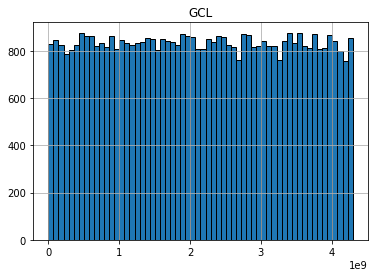

<Figure size 432x288 with 0 Axes>

In [84]:
plt.title('GCL')
plt.hist(resultado_gcl, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

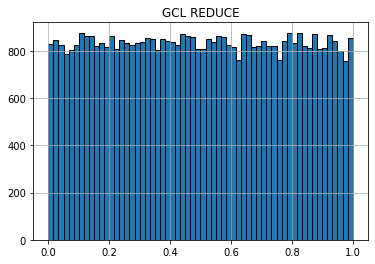

<Figure size 432x288 with 0 Axes>

In [85]:
plt.title('GCL REDUCE')
plt.hist(resultado_gcl_reduce, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

d) Basándose en el generador implementado en el ítem a, implemente el generador aditivo propuesto por Mitchell y Moore

```
𝑥𝑖+1 = ( 𝑥𝑖−24 + 𝑥𝑖−55) 𝑚𝑜𝑑 2^24
Donde 𝑥0,𝑥1, … , 𝑥54 son números arbitrarios no todos iguales.
```

In [86]:
def gen_mm(estados_previos):
    i = len(estados_previos)
    nuevo_estado = (estados_previos[i-24] + estados_previos[i-55])% 2**24
    estados_previos.append(nuevo_estado)
    return nuevo_estado, estados_previos

In [102]:
estados_iniciales = numeros_random(55, gcl, semilla)
resultado_gen_mm = numeros_random(muestra, gen_mm, estados_iniciales)

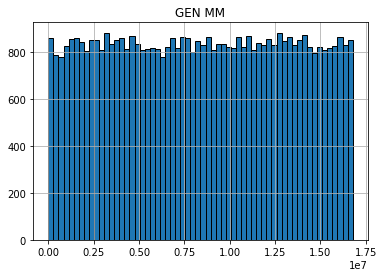

<Figure size 432x288 with 0 Axes>

In [103]:
plt.title('GEN MM')
plt.hist(resultado_gen_mm, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

## Ejercicio 2
Para cada uno de los generadores del ejercicio 1, proponer, y realizar, al menos 2 tests para evaluar su comportamiento. Evaluar e interpretar los resultados de cada uno para distintos tamaños de muestras.

### Test 1 Chi2 con nivel de significacion 1%

In [89]:
from scipy.stats import chi2

def chi_cuadrado(resultado, muestra, baldes): 
    frecuencias = np.histogram(resultado, bins=baldes)[0]

    D2 = sum([(fO - 1/baldes*muestra)**2 for fO in frecuencias])/(1/baldes*muestra)
    limiteSuperior = chi2.ppf(0.99, df=baldes-1)# Nivel de significacion 1%

    print("Limite superior: {:.2f} ".format(limiteSuperior))

    print("Estadistico: {:.2f} ".format(D2))

    if D2 <= limiteSuperior:
     print("El test acepta la hipotesis nula.")
    else:
     print("El test rechaza la hipótesis nula")

In [90]:
# Uniforme(0,1) gcl
chi_cuadrado(resultado_gcl, muestra, 10)

Limite superior: 21.67 
Estadistico: 5.63 
El test acepta la hipotesis nula.


In [91]:
# Uniforme(0,1) gen_mm
chi_cuadrado(resultado_gcl_reduce, muestra, 10)

Limite superior: 21.67 
Estadistico: 5.63 
El test acepta la hipotesis nula.


In [92]:
# Uniforme(0,1) gcl_reduce
chi_cuadrado(resultado_gen_mm, muestra, 10)

Limite superior: 21.67 
Estadistico: 8.41 
El test acepta la hipotesis nula.


### Test 2 Kolmogorov Smirnov

In [99]:
from scipy.stats import uniform
from scipy.stats import kstest

def proba_acumulada(generados, x): # TODO: Optimizar
    suma_menores = 0
    for gen in generados:
        if gen <= x:
            suma_menores +=1
    return suma_menores/len(generados)

In [110]:
def ks(resultado, muestra, max_rango = 1):
    max_dif = 0
    aux = 0
    for i in range(muestra):
        aux = abs( proba_acumulada(resultado, resultado[i]) - uniform.cdf(resultado[i], loc=0, scale=max_rango) )
        if aux > max_dif:
            max_dif = aux
    return max_dif

In [ ]:
# Uniforme(0,1) gcl
print(ks(resultado_gcl, muestra, 2**32))

In [114]:
kstest(resultado_gcl, 'uniform', args= (0, 2**32))

KstestResult(statistic=0.0032152038133889116, pvalue=0.6795160055303098)

In [98]:
# Uniforme(0,1) gcl_reduce
print(ks(resultado_gcl_reduce, muestra))

0.0032152038133889116


In [97]:
kstest(resultado_gcl_reduce, 'uniform')

KstestResult(statistic=0.0032152038133889116, pvalue=0.6795160055303098)

In [111]:
# Uniforme(0,1) gen_mm
print(ks(resultado_gen_mm, muestra, 2**24))

0.002538340568542463


In [108]:
kstest(resultado_gen_mm, 'uniform', args= (0, 2**24))

KstestResult(statistic=0.002558340568542483, pvalue=0.8989758022543677)

# Ejercicio 3
Se desea generar puntos al azar con distribución uniforme dentro del área descripta en el gráfico utilizando los siguientes
generadores de números al azar:

a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp

b) Alguno de los generadores de números al azar implementados con el algoritmo del ejercicio 1.

c) Calcule el factor de rendimiento del método.

In [22]:
def point_in_circle(c_x, c_y, r, gen):
    radio =  gen() % r
    theta = gen() * 2 * pi
    return c_x + cos(theta) * radio, c_y + sin(theta) * radio

In [23]:
random.seed(semilla)

In [24]:
# a
muestra = 100000
def python_random():
    result = []
    uniform = lambda: random.uniform(0,360)
    for i in range(muestra):
        result.append(point_in_circle(10,10,5,uniform))
    return result

In [25]:
result_python = python_random()

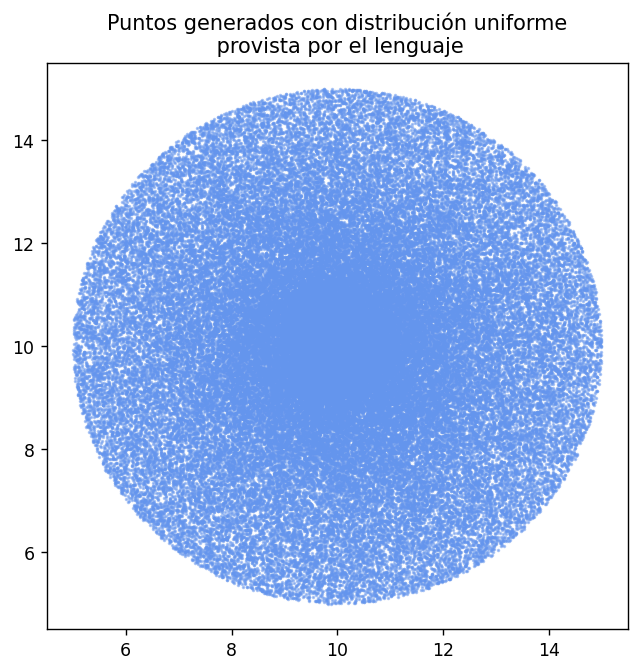

In [26]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_python], [p[1] for p in result_python], color="cornflowerblue", alpha=0.5, s=1)
plt.title("Puntos generados con distribución uniforme\n provista por el lenguaje")
plt.show()

In [27]:
# b
muestra = 100000

def gcl_random():
    result = []
    global estado_actual
    estado_actual = semilla
    def gen_propio():
        global estado_actual
        numero_random, estado_actual = gcl_reduce(estado_actual)
        return (numero_random%360)*5
    for i in range(muestra):
        result.append(point_in_circle(10,10,5,gen_propio))
    return result

In [28]:
result_gcl = gcl_random()

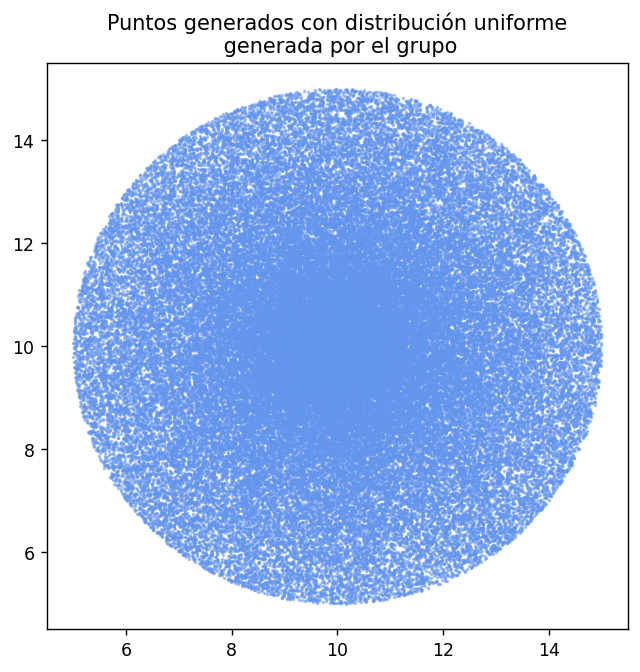

In [29]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_gcl], [p[1] for p in result_gcl], color="cornflowerblue", alpha=0.5, s=1)
plt.title("Puntos generados con distribución uniforme\n generada por el grupo")
plt.show()

In [30]:
def is_point_in_circle(x, y, r, deltax, deltay):
    return (x - deltax)**2 + (y - deltay)**2 <= r**2

In [31]:
random.seed(semilla)

In [32]:
# a
muestra = 100000
def python_random_2():
    result = []
    rejected_points = []
    for i in range(muestra):
        x, y = random.uniform(5, 15), random.uniform(5, 15)
        if is_point_in_circle(x, y, 5, 10, 10):
            result.append((x, y))
        else:
            rejected_points.append((x, y))
    return result, rejected_points

In [33]:
result_python_2, rejected_points = python_random_2()

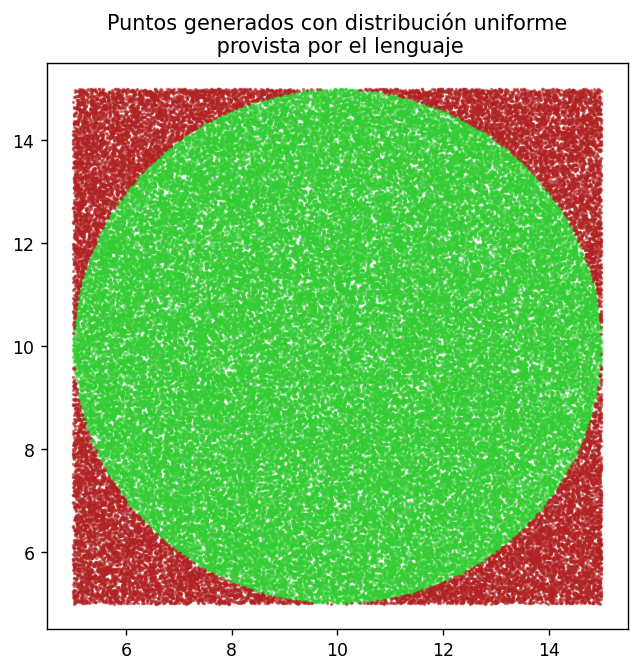

In [34]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_python_2], [p[1] for p in result_python_2], color="limegreen", alpha=0.5, s=1)
plt.scatter([p[0] for p in rejected_points], [p[1] for p in rejected_points], color="firebrick", alpha=0.5, s=1)
plt.title("Puntos generados con distribución uniforme\n provista por el lenguaje")
plt.show()

In [35]:
# b
muestra = 100000

def gcl_random_2():
    result = []
    rejected_points = []
    estado_actual = semilla            
    for i in range(muestra):
        x, estado_actual = gcl_reduce(estado_actual)
        x = x*10+5
        y, estado_actual = gcl_reduce(estado_actual)
        y = y*10+5
        if is_point_in_circle(x, y, 5, 10, 10):
            result.append((x, y))
        else:
            rejected_points.append((x, y))
    return result, rejected_points

In [36]:
result_gcl_2, rejected_points_gcl = gcl_random_2()

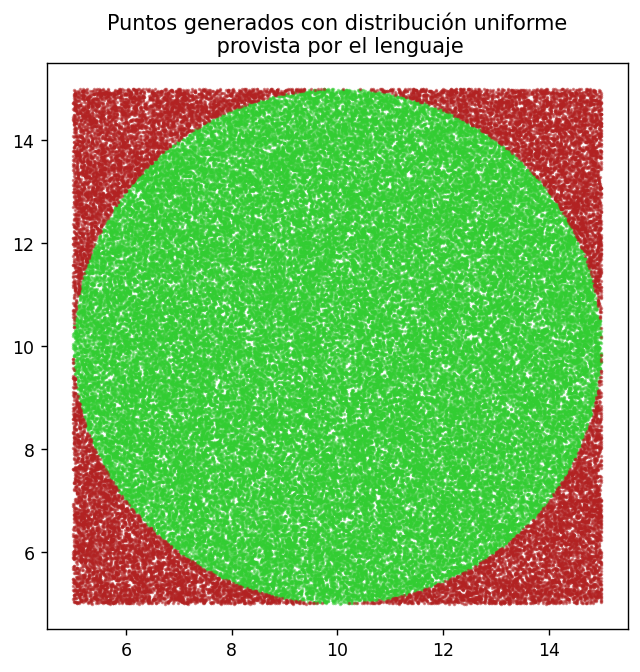

In [37]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_gcl_2], [p[1] for p in result_gcl_2], color="limegreen", alpha=0.5, s=1)
plt.scatter([p[0] for p in rejected_points_gcl], [p[1] for p in rejected_points_gcl], color="firebrick", alpha=0.5, s=1)
plt.title("Puntos generados con distribución uniforme\n provista por el lenguaje")
plt.show()

In [38]:
# c 
r_uniform = len(result_python_2) / muestra
print(r_uniform)

0.78455


In [39]:
# c 
r_gcl = len(result_gcl_2) / muestra
print(r_gcl)

0.78695


## Ejercicio 4
Para la siguiente densidad de probabilidad, se pide:

![](densidad_ej4.png)

a) Definir la función de densidad de probabilidad.

$$ f_x(x)=  \left\{
\begin{array}{ll}
      \frac{1}{15}x - \frac{1}{15} & x\geq1 \land x<4 \\
      -\frac{2}{45}x + \frac{17}{45} & x\geq4 \land x<6 \\
      \frac{1}{9} & x\geq6 \land x<9 \\
      \frac{-1}{9}x +\frac{10}{9} & x\geq9 \land x<10 \\
      0 & otro caso \\
\end{array} 
\right. $$ 

In [73]:
def funcion_densidad(x):
    if x>=1 and x<4:
        return 1/15*(x - 1)
    elif x>=4 and x<6:
        return 1/45*(17 - 2*x)
    elif x>=6 and x<9:
        return 1/9
    elif x>=9 and x<10:
        return 1/9 * (10 - x)
    return 0

b) Calcular y graficar la función de probabilidad acumulada y su inversa.

En un primer lugar se calcula la función de probabilidad acumulada:


$$F_x(x)=\int_{-\infty}^{x} f_x(x)\ dx= \left\{
\begin{array}{ll}
      0 & x<1 \\
      \frac{1}{30}*(x-1)^2 & x\geq1 \land x<4 \\
      \frac{3}{10} + \frac{1}{45}(- x^2 + 17x - 52) & x\geq4 \land x<6 \\
      \frac{11}{18} + \frac{x}{9} - \frac{2}{3} & x\geq6 \land x<9 \\
      \frac{17}{18} + \frac{1}{18}*(-x^2 + 20x - 99) & x\geq9 \land x<10 \\
      1 & x\geq10
\end{array} 
\right. $$

In [60]:
def probabilidad_acumulada(x):
    if x<=1:
        return 0
    elif x>=1 and x<4:
        return 1/30*(x - 1)**2
    elif x>=4 and x<6:
        return 3/10 + 1/45*(- x**2 + 17*x - 52)
    elif x>=6 and x<9:
        return 11/18 + x/9 - 2/3
    elif x>=9 and x<10:
        return 17/18 + 1/18*(- x**2 + 20*x - 99)
    return 1

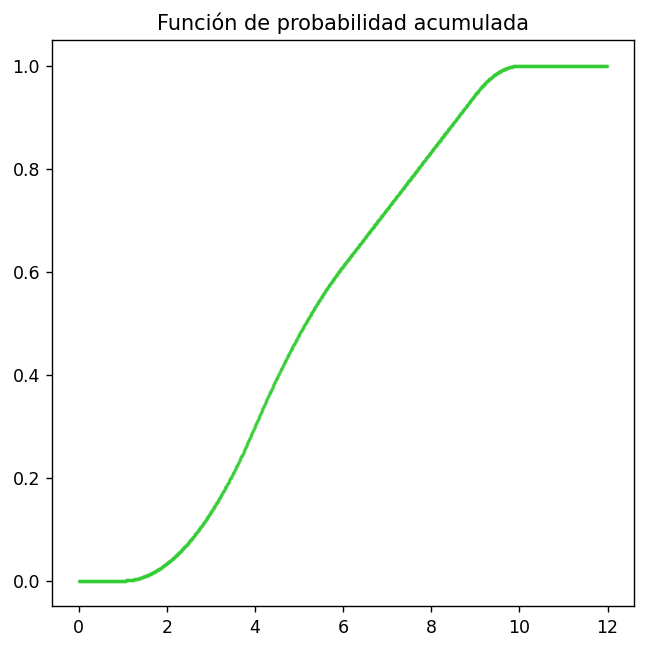

In [61]:
points = np.arange(0, 12, 0.01)
nums = []

for x in points:
    nums.append(probabilidad_acumulada(x))

plt.figure(dpi=125, figsize=(6, 6))
plt.scatter(points, [num for num in nums], color="limegreen", alpha=0.5, s=1)
plt.title("Función de probabilidad acumulada")
plt.show()

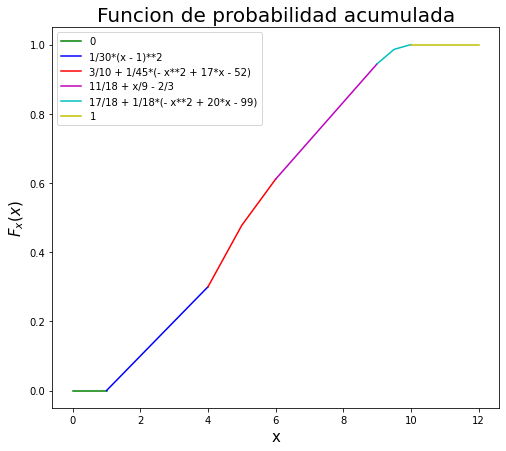

In [62]:
x1 = np.linspace(0, 1, num=3)
x2 = np.linspace(1, 4, num=2)
x3 = np.linspace(4, 6, num=3)
x4 = np.linspace(6, 9, num=3)
x5 = np.linspace(9, 10, num=3)
x6 = np.linspace(10, 12, num=3)
 
plt.figure(figsize = (8, 7))
plt.plot(x1, [0 for x in x1], 'g', label='0')
plt.plot(x2, [probabilidad_acumulada(x) for x in x2], 'b', label='1/30*(x - 1)**2')
plt.plot(x3, [probabilidad_acumulada(x) for x in x3], 'r', label='3/10 + 1/45*(- x**2 + 17*x - 52)')
plt.plot(x4, [probabilidad_acumulada(x) for x in x4], 'm', label='11/18 + x/9 - 2/3')
plt.plot(x5, [probabilidad_acumulada(x) for x in x5], 'c', label='17/18 + 1/18*(- x**2 + 20*x - 99)')
plt.plot(x6, [probabilidad_acumulada(x) for x in x6], 'y', label='1')
 
    
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.title("Funcion de probabilidad acumulada", size =20)
plt.xlabel("x", size=15)
plt.ylabel('$F_x(x)$', size=15)
plt.legend()
plt.show()

Luego se calcula la inversa de la función de probabilidad acumulada:

Si $F_X(x) = P(X \leq x) = y$ => $F_X^{-1}(y) = x$

Se reemplaza el valor de los extremos en los distintos intervalos para obtener los extremos de la función inversa y se halla el valor de la función en los mismos.

$$F_X^{-1}(y)= \left\{
\begin{array}{ll}
      \sqrt{30y} + 1 & y\geq0 \land y<\frac{3}{10} \\
      \frac{17}{2} - \frac{3}{2} * \sqrt{-20y+15} & y\geq\frac{3}{10} \land y<\frac{11}{18} \\
      9y + \frac{1}{2} & y\geq \frac{11}{18} \land y<\frac{17}{18} \\
      10 - 3\sqrt{-2y +2} & y\geq\frac{17}{18} \land y<1 \\
\end{array} 
\right. $$

In [70]:
def inversa_probabilidad_acumulada(y):
    if y>=0 and y<3/10:
        return sqrt(30*y) + 1
    elif y>=3/10 and y<11/18:
        return 17/2 - 3/2*sqrt(-20*y+15)
    elif y>=11/18 and y<17/18:
        return 9*y + 1/2
    elif y>=17/18 and y<1:
        return 10 - 3*sqrt(-2*y+2)

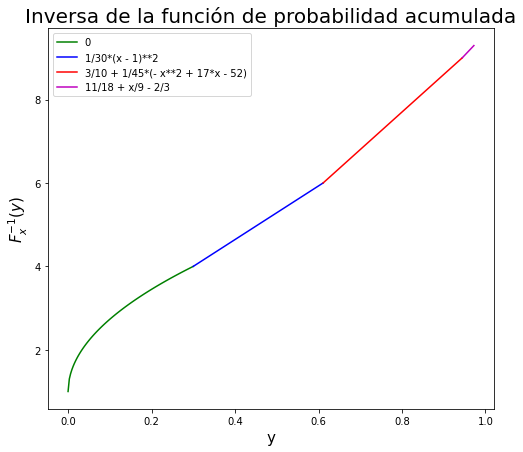

In [71]:
x1 = np.linspace(0, 3/10, num=100)
x2 = np.linspace(3/10, 11/18, num=2)
x3 = np.linspace(11/18, 17/18, num=3)
x4 = np.linspace(17/18, 1, num=3)
 
plt.figure(figsize = (8, 7))
plt.plot(x1, [inversa_probabilidad_acumulada(x) for x in x1], 'g', label='0')
plt.plot(x2, [inversa_probabilidad_acumulada(x) for x in x2], 'b', label='1/30*(x - 1)**2')
plt.plot(x3, [inversa_probabilidad_acumulada(x) for x in x3], 'r', label='3/10 + 1/45*(- x**2 + 17*x - 52)')
plt.plot(x4, [inversa_probabilidad_acumulada(x) for x in x4], 'm', label='11/18 + x/9 - 2/3')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.title("Inversa de la función de probabilidad acumulada", size =20)
plt.xlabel("y", size=15);
plt.ylabel('$F^{-1}_x(y)$', size=15);
plt.legend();
plt.show()

c) Utilizando el generador de números aleatorios implementado en el ítem b del ejercicio 1, genere números al azar
con la distribución propuesta.

In [90]:
muestra = 50000
resultado_gcl_reduce = numeros_random(muestra, gcl_reduce, semilla)
generados_dist = []
for y in resultado_gcl_reduce:
    x = inversa_probabilidad_acumulada(y)
    generados_dist.append(x)

In [105]:
for i in range(10):
    print(generados_dist[i])

3.3687784312370694
6.047270091949031
8.852208557073027
3.1575962401150446
7.613669777754694
7.196443903027102
3.807887420088611
6.659701491473243
8.127607176546007
2.5150263179360057


d) Realice los gráficos que considere necesarios para mostrar la distribución de números al azar generados.

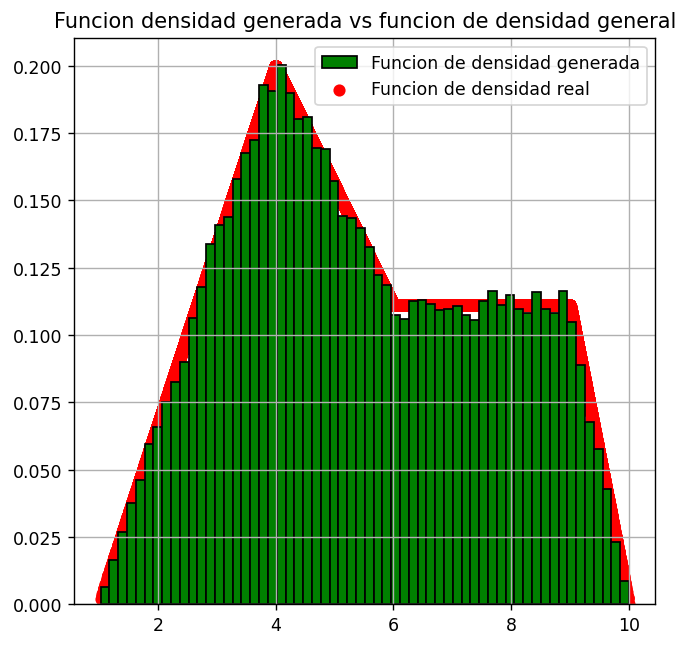

<Figure size 432x288 with 0 Axes>

In [130]:
plt.figure(dpi=125, figsize=(6, 6))
plt.title('Funcion densidad generada vs funcion de densidad general')
plt.scatter(generados_dist, [funcion_densidad(x) for x in generados_dist], color = 'red', label='Funcion de densidad real')
plt.hist(generados_dist, density=True, bins=60, alpha=1, color='green', edgecolor = 'black', linewidth=1, label='Funcion de densidad generada')
plt.grid(True)
plt.legend()
plt.show()
plt.clf()

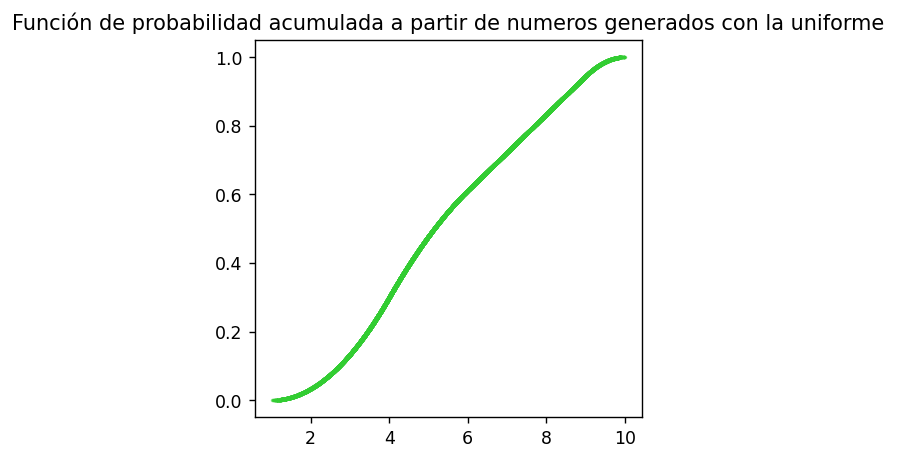

In [103]:
plt.figure(dpi=125, figsize=(4, 4))
plt.scatter(generados_dist, resultado_gcl_reduce, color="limegreen", alpha=0.5, s=1)
plt.title("Función de probabilidad acumulada a partir de numeros generados con la uniforme")
plt.show()

## Ejercicio 5

1. Implemente un método para generar variables aleatorias con distribución normal con media 15 y desvío 3.
1. Muestre gráficamente la distribución que siguen los números pseudoaleatorios generados.
1. Realice 2 tests de los explicados en la materiapara verificar si los números generados siguen la distribución pedida(evalué los resultadospara distintos tamaños de muestra).

In [144]:
cant_dist = 10
muestra = 50000
media = 0.5
desvio = 1

result = [0 for i in range(muestra)]
for i in range(cant_dist):
    gcl_res = numeros_random(muestra, gcl_reduce, semilla*i)
    for i in range(muestra): 
        result[i]+=gcl_res[i]
        
result_norm_standard = list(map(lambda x: (x - cant_dist*media)/sqrt(cant_dist*desvio), result))

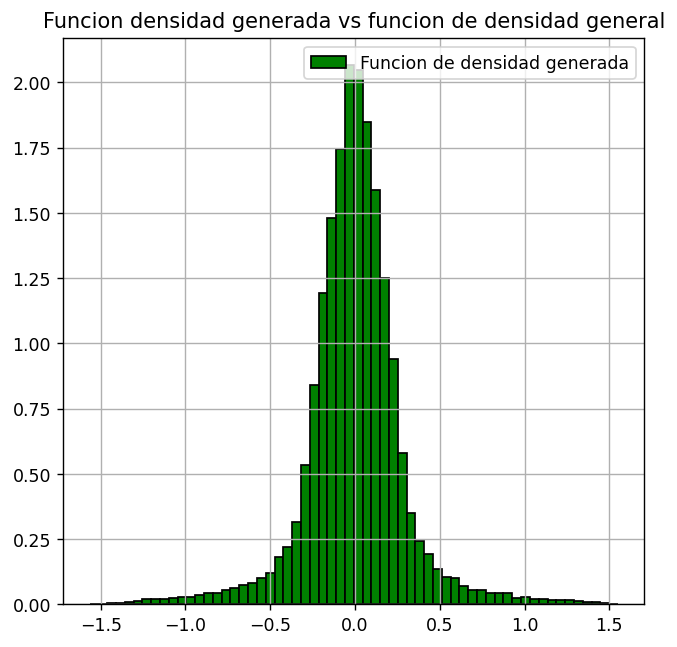

<Figure size 432x288 with 0 Axes>

In [145]:
plt.figure(dpi=125, figsize=(6, 6))
plt.title('Funcion densidad generada vs funcion de densidad general')
plt.hist(result_norm_standard, density=True, bins=60, alpha=1, color='green', edgecolor = 'black', linewidth=1)
plt.grid(True)
plt.legend()
plt.show()
plt.clf()

In [150]:
def normal_15_3(x):
    return (1/sqrt(6*pi)) * exp((-1/6) * (x - 15)**2)

In [159]:
m=500
c=400/8
rech=0
acep=0

nros=[]
for i in range(m):
    r1=np.random.exponential(scale = 15, size = 1)[0]
    r2=random.random()
    fx=normal_15_3(r1*15)
    if(r2 < (fx/(r1*c))):
        nros.append(r1)
        
print(len(nros))

0


No handles with labels found to put in legend.


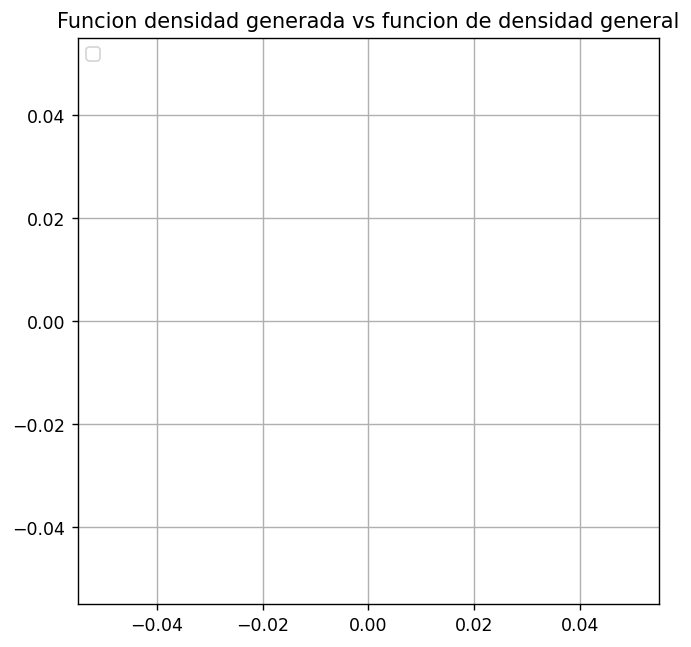

<Figure size 432x288 with 0 Axes>

In [160]:
plt.figure(dpi=125, figsize=(6, 6))
plt.title('Funcion densidad generada vs funcion de densidad general')
plt.hist(nros, density=True, bins=60, alpha=1, color='green', edgecolor = 'black', linewidth=1)
plt.grid(True)
plt.legend()
plt.show()
plt.clf()